### 6.5 Machine Learning Part 2

#### Contents 
1. Importing libraries and data and renaming columns
2. Preparing the data
3. The elbow technique
4. k-means clustering

#### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
path = '/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Immersion/Achievement 6/World Happiness Report'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '2015 - 2019 Cleaned.pkl'))

In [4]:
df.shape

(782, 10)

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,139651.0,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,130232.0,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,132548.0,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1459.0,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,132629.0,0.90563,0.63297,0.32957,0.45811,2015


#### 2. Preparing the Data

In [6]:
# Normalise GDP column

from sklearn.preprocessing import MinMaxScaler

In [7]:
# Create MinMaxScaler object

scaler = MinMaxScaler()

# Normalise the 'Economy (GDP per capita)' column

df['Economy (GDP per capita)_normalized'] = scaler.fit_transform(df[['Economy (GDP per Capita)']])

In [8]:
df['Economy (GDP per Capita)'] = pd.to_numeric(df['Economy (GDP per Capita)'], errors='coerce')
df['Economy (GDP per Capita)'].fillna(0, inplace=True)

/var/folders/bm/wxz2f90s7x104nl7tfs2lwdw0000gn/T/ipykernel_33778/3271549331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Economy (GDP per Capita)'].fillna(0, inplace=True)


In [9]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Economy (GDP per capita)_normalized
0,Switzerland,Western Europe,1,7.587,139651.0,0.94143,0.66557,0.41978,0.29678,2015,1.401847e-10
1,Iceland,Western Europe,2,7.561,130232.0,0.94784,0.62877,0.14145,0.43630,2015,1.307297e-10
2,Denmark,Western Europe,3,7.527,132548.0,0.87464,0.64938,0.48357,0.34139,2015,1.330546e-10
3,Norway,Western Europe,4,7.522,1459.0,0.88521,0.66973,0.36503,0.34699,2015,1.464576e-12
4,Canada,North America,5,7.427,132629.0,0.90563,0.63297,0.32957,0.45811,2015,1.331359e-10


In [10]:
# drop the non-standarised GDP 

df = df.drop(columns=['Economy (GDP per Capita)'])

In [11]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Economy (GDP per capita)_normalized
0,Switzerland,Western Europe,1,7.587,0.94143,0.66557,0.41978,0.29678,2015,1.401847e-10
1,Iceland,Western Europe,2,7.561,0.94784,0.62877,0.14145,0.43630,2015,1.307297e-10
2,Denmark,Western Europe,3,7.527,0.87464,0.64938,0.48357,0.34139,2015,1.330546e-10
3,Norway,Western Europe,4,7.522,0.88521,0.66973,0.36503,0.34699,2015,1.464576e-12
4,Canada,North America,5,7.427,0.90563,0.63297,0.32957,0.45811,2015,1.331359e-10


##### Checking and removing outliers

In [12]:
# Columns to exclude

exclude_cols = ['Happiness Rank', 'Year']

In [13]:
# Select numerical columns except those to exclude

numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]

In [14]:
# Create a copy to keep outlier numbers

df_no_outliers = df.copy()

In [15]:
# Loop through the columns

for column_name in numeric_cols:
    
    Q1 = df_no_outliers[column_name].quantile(0.25)
    Q3 = df_no_outliers[column_name].quantile(0.75)
    IQR = Q3 - Q1

In [16]:
# Define outlier bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
# Identify outliers

outliers = df_no_outliers[(df_no_outliers[column_name] < lower_bound) | (df_no_outliers[column_name] > upper_bound)]
print(f"Number of outliers in {column_name}: {len(outliers)}")

Number of outliers in Economy (GDP per capita)_normalized: 154


In [18]:
# Remove outliers from df_no_outliers
    
df_no_outliers = df_no_outliers[(df_no_outliers[column_name] >= lower_bound) & (df_no_outliers[column_name] <= upper_bound)]

In [19]:
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_no_outliers.shape}")

Original DataFrame shape: (782, 10)
DataFrame shape after outlier removal: (628, 10)


#### 3. The elbow technique 

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.

kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
df_numeric = df_no_outliers.select_dtypes(include=['number'])

In [22]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

score

[-126231384.70672727,
 -38388480.29194635,
 -25931135.00553482,
 -19519031.766309053,
 -16157730.92472622,
 -14065296.79575273,
 -12654067.922879588,
 -11592237.143712144,
 -10670916.279414885]

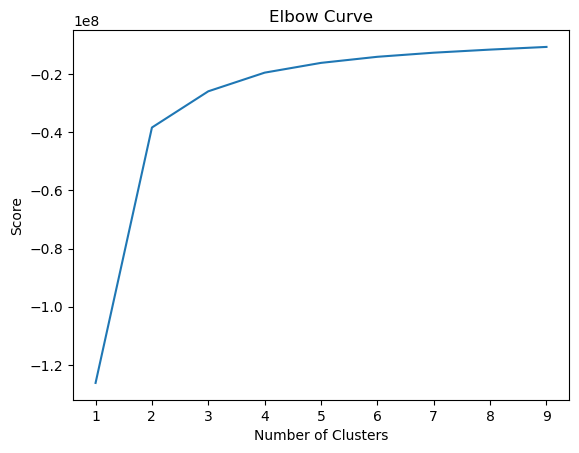

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve suggests that the optimal number of clusters for the K-means algorithm lies between 2 and 4, as the most significant reduction in the sum of squared errors occurs within this range. While selecting 2 clusters offers a marked improvement over a single cluster, the incremental benefit diminishes considerably after three. Thus, to balance model complexity with data representation, it is better and has a reasonable explanatory power, we will not overfit and add clusters with not accurate insights.

#### 4. K-means clustering

In [24]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [25]:
# Fit the k-means object to the data.

kmeans.fit(df_numeric)

KMeans(n_clusters=3)

In [26]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

In [27]:
df_numeric.head()

,Happiness Rank,Happiness Score,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Economy (GDP per capita)_normalized,clusters
0,1,7.587,0.94143,0.66557,0.41978,0.29678,2015,1.401847e-10,2
1,2,7.561,0.94784,0.62877,0.14145,0.43630,2015,1.307297e-10,2
2,3,7.527,0.87464,0.64938,0.48357,0.34139,2015,1.330546e-10,2
3,4,7.522,0.88521,0.66973,0.36503,0.34699,2015,1.464576e-12,2
4,5,7.427,0.90563,0.63297,0.32957,0.45811,2015,1.331359e-10,2


In [28]:
df_numeric['clusters'].value_counts()

clusters
2    370
1    144
0    114
Name: count, dtype: int64

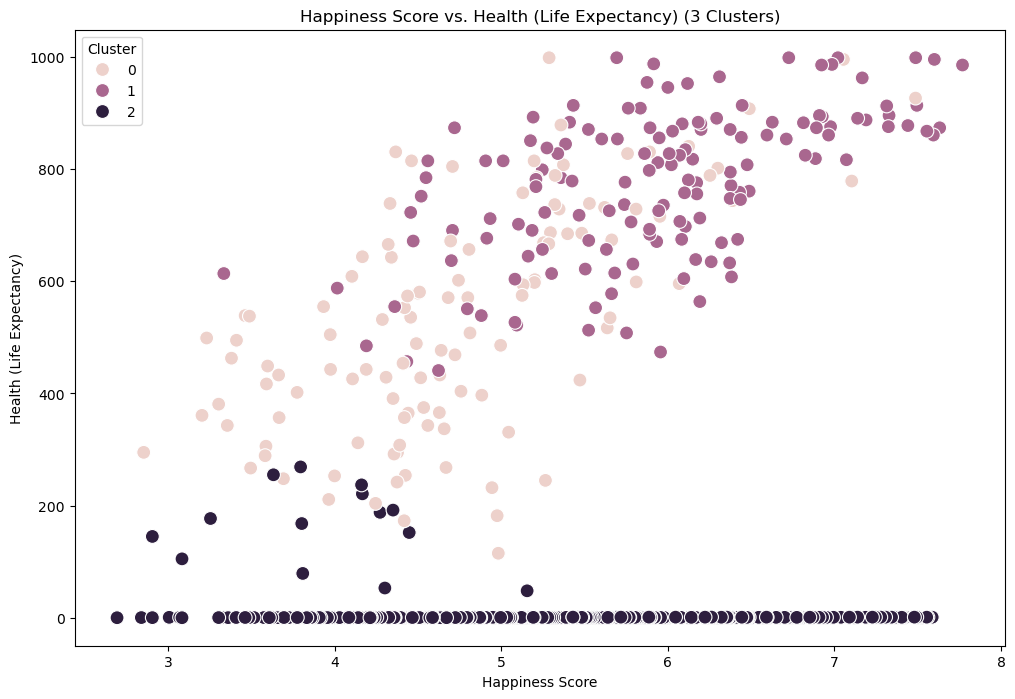

In [29]:
# Plot the clusters for the "Health (Life Expectancy)" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Happiness Score'], y=df_numeric['Health (Life Expectancy)'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.title('Happiness Score vs. Health (Life Expectancy) (3 Clusters)')
plt.xlabel('Happiness Score') 
plt.ylabel('Health (Life Expectancy)') 

plt.legend(title='Cluster')
plt.show()

The scatterplot, divided into three clusters, shows a clear positive correlation of data. However, two of these clusters were almost the same, meaning that the Elbow Chart might needed adjustments. In summary, while it helps to better create some segments, it's still not as great, and additional factors might make it a better model to apply.

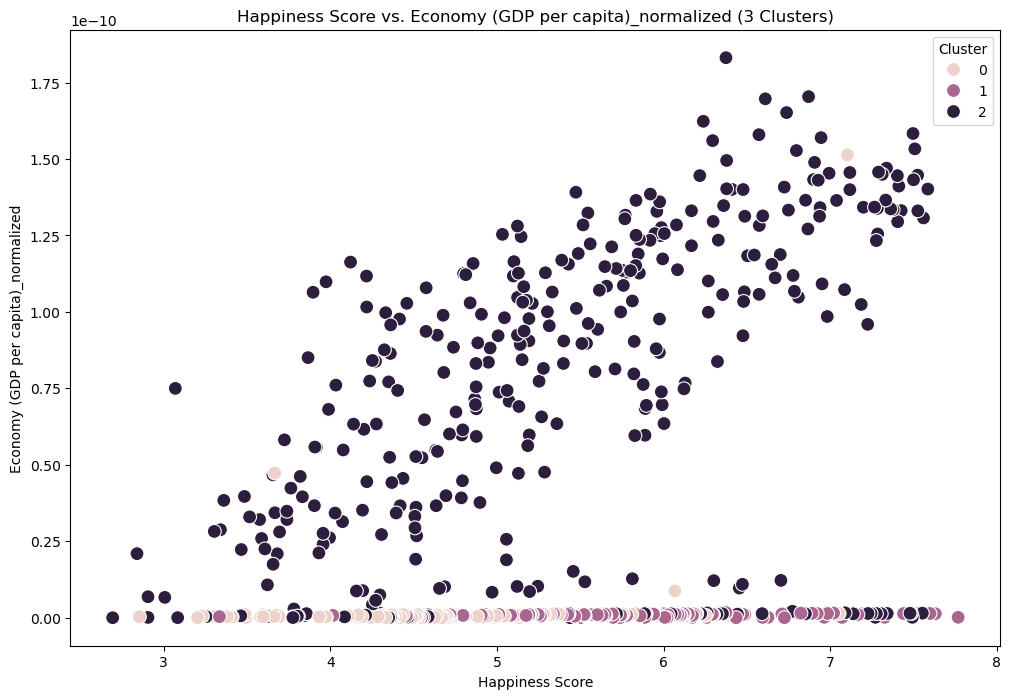

In [30]:
# Plot the clusters for the "Economy (GDP per capita)_normalized" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Happiness Score'], y=df_numeric['Economy (GDP per capita)_normalized'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.title('Happiness Score vs. Economy (GDP per capita)_normalized (3 Clusters)')
plt.xlabel('Happiness Score') 
plt.ylabel('Economy (GDP per capita)_normalized') 

plt.legend(title='Cluster')
plt.show()

In [31]:
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [32]:
df_numeric.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                        'Trust (Government Corruption)':['mean', 'median'],
                        'Generosity':['mean', 'median'],
                         'Economy (GDP per capita)_normalized':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median'],
                          'Freedom':['mean', 'median']})

Happiness Score         Trust (Government Corruption)             \
                       mean  median                          mean     median   
cluster                                                                        
dark purple        5.364603  5.2825                     21.401112   0.125185   
pink               4.736211  4.6350                     72.124700  60.000000   
purple             5.933201  5.9520                     97.286181  75.000000   

             Generosity           Economy (GDP per capita)_normalized  \
                   mean    median                                mean   
cluster                                                                 
dark purple   30.149641    0.2421                        7.171735e-11   
pink         148.351353  148.0000                        2.428474e-12   
purple       165.643611  149.5000                        9.274616e-13   

                          Health (Life Expectancy)                Freedom  \
                   median                     mean     median        mean   
cluster                                                                     
dark purple  7.737007e-11                 6.777578    0.66173   55.148665   
pink         6.494727e-13               533.578947  533.50000  242.945631   
purple       1.026408e-12               775.340278  798.50000  504.243056   

                     
             median  
cluster              
dark purple    0.44  
pink         267.50  
purple       518.50

In [33]:
df_no_outliers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'No outliers_ normalised_World Happiness Rankings.pkl'))

In [34]:
df_no_outliers.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'No_outliers_normalised_World Happiness Rankings.csv'), index=False)

In [35]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', '2015 - 2019 cleaned.csv'), index=False)